In [2]:
#Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [3]:
#Initialization
xmax=10.0 #physical domain (m)
nx=100 #numberof space samples
a=0.25 #exponent of Gaussian function
dx=xmax/(nx-1) #Gridspacing dx (m)
x0=xmax/2 #Center of Gaussian function x0 (m)

x=np.linspace(0,xmax,nx) #defining space variables

#Initialization of Gaussian Function
f=(1./sqrt(2*pi*a))*np.exp(-(((x-x0)**2)/(2*a)))

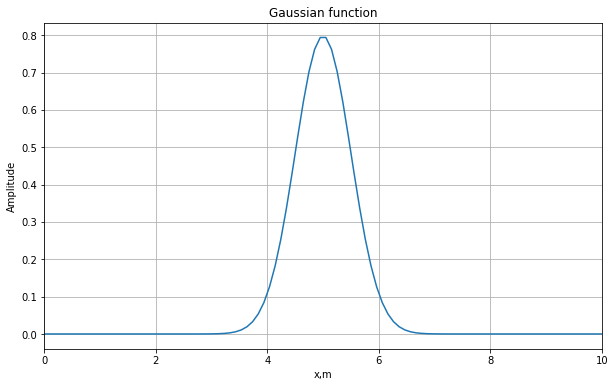

In [5]:
#Plotting of gaussian
plt.figure(figsize=(10,6))
plt.plot(x,f)
plt.title('Gaussian function')
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.xlim((0,xmax))
plt.grid()
plt.show()

In [6]:
#Second derivative with three point operator

#Initiation of numerical and analytical derivatives 
nder3=np.zeros(nx)
ader=np.zeros(nx)

#numerical second derivative of the function
for i in range (1,nx-1):
    nder3[i]=(f[i+1]-2*f[i]+f[i-1])/(dx**2)
    
#analytical solution
ader=1./sqrt(2*pi*a)*((x-x0)**2/a**2 -1/a)*np.exp(-1/(2*a)*(x-x0)**2)

#Exclude boundaries
ader[0]=0
ader[nx-1]=0

#rms error of numerical derivative
rms=np.sqrt(np.mean((ader-nder3)**2))


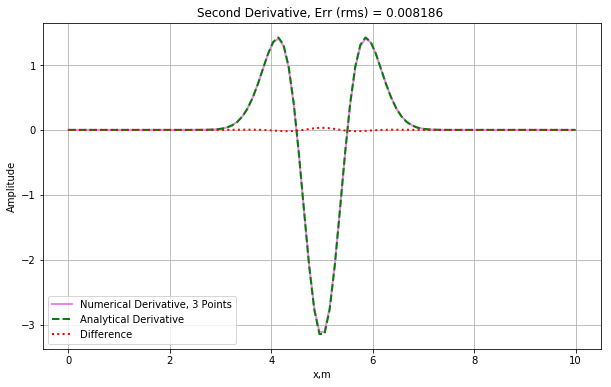

In [8]:
#Plotting
plt.figure(figsize=(10,6))
plt.plot(x,nder3,label="Numerical Derivative, 3 Points",lw=2,color="violet")
plt.plot(x,ader,label="Analytical Derivative",lw=2,ls="--",color="green")
plt.plot(x,nder3-ader,label="Difference",lw=2,ls=":",color="red")
plt.title("Second Derivative, Err (rms) = %.6f " % (rms))
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [9]:
#second derivative with 5 points

#initialize the derivative
nder5=np.zeros(nx)

#calculation of 2nd derivatives
for i in range(2,nx-2):
    nder5[i] = (-1./12 * f[i - 2] + 4./3 * f[i - 1]- 5./2 * f[i] + 4./3 * f[i + 1] - 1./12 * f[i + 2]) / dx ** 2
    
#exclude boundaries
ader[1]=0
ader[nx-2]=0

#calculate rms error
rms=rms*0
rms=np.sqrt(np.mean((nder5-ader)**2))

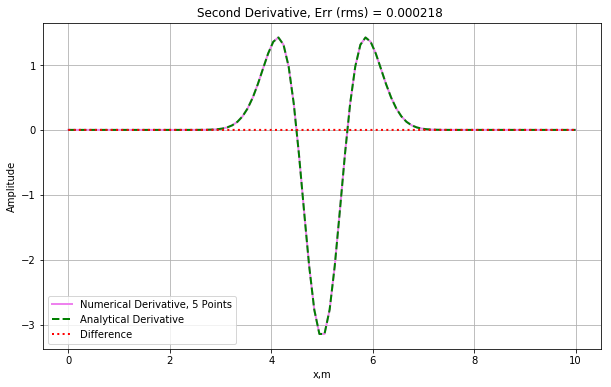

In [10]:
#Plotting
plt.figure(figsize=(10,6))
plt.plot(x,nder5,label="Numerical Derivative, 5 Points",lw=2,color="violet")
plt.plot(x,ader,label="Analytical Derivative",lw=2,ls="--",color="green")
plt.plot(x,nder5-ader,label="Difference",lw=2,ls=":",color="red")
plt.title("Second Derivative, Err (rms) = %.6f " % (rms))
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()